# Digital Signal Processing
## Homework Assignment №1
---
## Parth Shrikant Kalkar BS19-DS-01
#### p.kalkar@innopolis.university
#### 10 April 2022

## Task 1

In [1]:
import numpy as npy
import random as ra
from matplotlib import pyplot as plt

count = 500
y_clean = []
y_noise = []
S = npy.linspace(0, 1, count)

cleanSignal = "Clean Signal"
noisySignal = "Noisy Signal"

# y(t) = sin(2π50t) + sin(2π120t) and yϵ(t) = y(t) + ϵ
for s in S:
    x1 = 2*npy.pi*120*s
    x2 = 2*npy.pi*50*s
    y_clean.append(npy.sin(x1) + npy.sin(x2))
    _random = ra.randint(-5,5)
    y_noise.append(y_clean[-1] + _random)

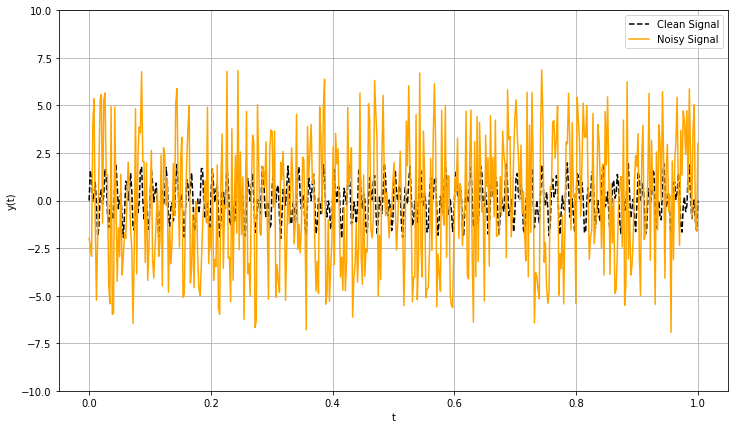

In [2]:
graph, X = plt.subplots(1, 1, figsize=(12, 7))
X.plot(S, y_clean, '--', color='black', label=cleanSignal)
X.plot(S, y_noise, color='orange',  label=noisySignal)
ylable = "y(t)"
X.set_ylabel(ylable)
xlable = "t"
X.set_xlabel(xlable)
X.legend()
X.set_ylim((-10,10))
X.grid()
plt.show()

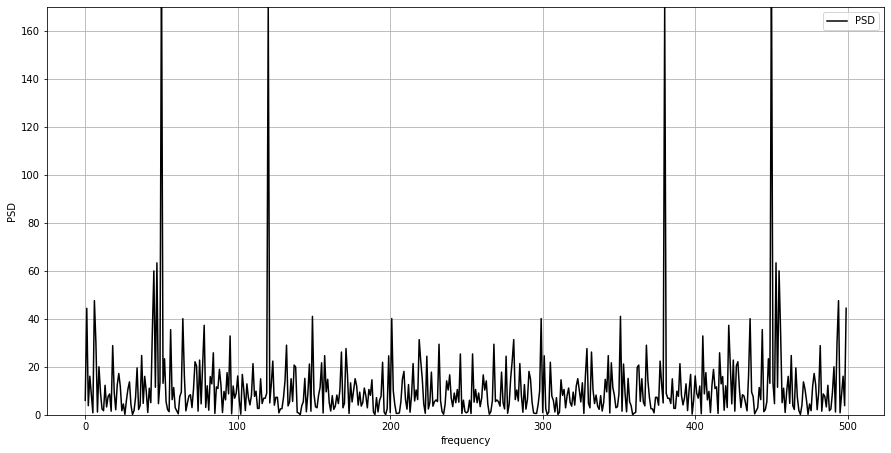

In [3]:
z = npy.fft.fft(y_noise) # Fast Fourier Transform (FFT)
z_conjugate = npy.conjugate(z) # conjugate of z
size = len(z)
PDS = z * z_conjugate / size
graph, X = plt.subplots(1, 1, figsize=(15, 7.5))
realPart = PDS.real
X.plot(realPart, color='black',  label="PSD") # real part
ylable = "PSD"
X.set_ylabel(ylable) # setting y lable
frq = "frequency"
X.set_xlabel(frq) # setting x lable
X.grid()
X.set_ylim((0,170))
X.legend()
plt.show()

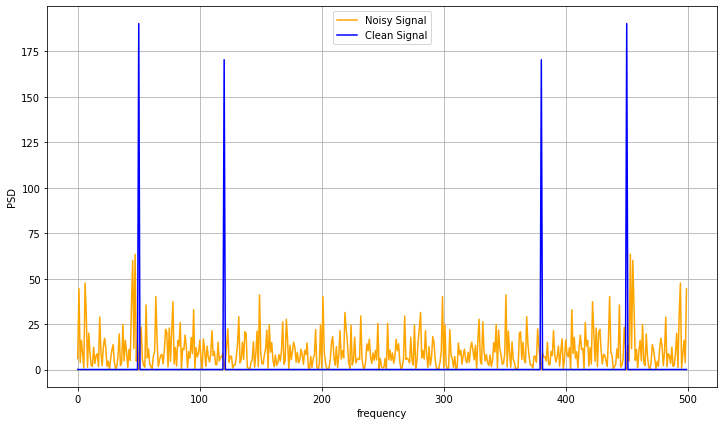

In [4]:
indeces = []
sizePDS = len(PDS)

PDS_Copy = PDS.copy()
PDS_threshold = PDS.copy()
PDS_not = PDS.copy()

for i in range(sizePDS):
    if PDS[i] < 100:
      PDS_not[i] = 0
      indeces.append(i)
    else:
      PDS_threshold[i] = 0
      
graph, X = plt.subplots(1, 1, figsize=(12, 7))
realPart_th = PDS_threshold.real
X.plot(realPart_th, color='orange',  label=noisySignal)
realPart_not = PDS_not.real
X.plot(realPart_not, color='blue',  label=cleanSignal)
xlable = "frequency"
X.set_xlabel(xlable)
ylable = "PSD"
X.set_ylabel(ylable)
X.grid()
X.legend()
plt.show()

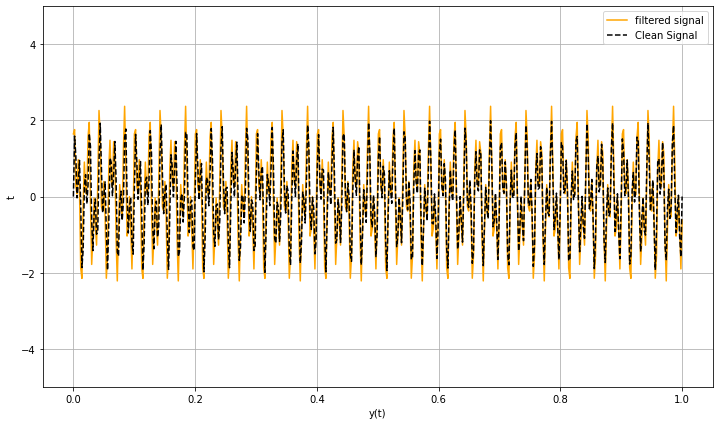

In [5]:

z_ind = z.copy()
zero = 0
for ind in indeces:
    z_ind[ind] = zero

z_inv = npy.fft.ifft(z_ind) # ifft is The inverse of fft.
x_axis = 12
y_axis = 7
graph, X = plt.subplots(1, 1, figsize=(x_axis, y_axis))
filterSingnal = "filtered signal"
realPart = z_inv.real 
X.plot(S, realPart, color='orange',  label=filterSingnal)
X.plot(S, y_clean, '--', color='black',  label=cleanSignal)
xlable = "y(t)"
X.set_xlabel(xlable)
ylable = "t"
X.set_ylabel(ylable)
X.grid()
X.set_ylim((-5,5))
X.legend()
plt.show()

## Task 2

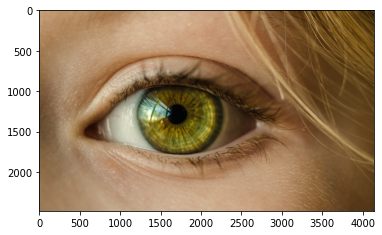

In [6]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread('image.jpg')
plt.imshow(img)

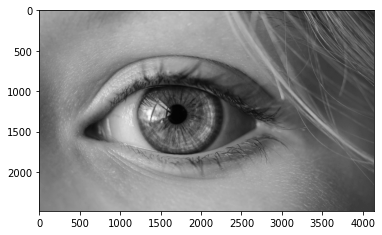

In [7]:
_R = img[:,:,0]
_G = img[:,:,1]
_B = img[:,:,2]

R, G, B = _R, _G, _B 

w = 0.2989 * R
h = 0.5870 * G
c = 0.1140 * B

A = w + h + c
plt.imshow(A, cmap='gray')
one = 1

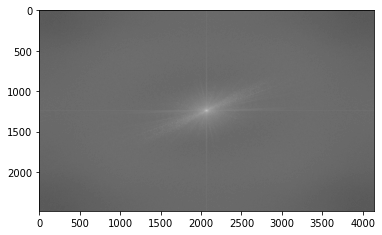

In [8]:
F2 = np.fft.fft2(A)
s = F2
F2_sh = np.fft.fftshift(s)
F2_abs = np.abs(F2_sh)
l = F2_abs + 1
F2_log = np.log(l)
plt.imshow(F2_log, cmap='gray')


In [9]:
w, h = F2_sh.shape
wh = w*h
F2_resh = np.reshape(F2_sh, (wh, 1))
print(F2_resh)

[[-148189.1363    -5.00222086e-12j]
 [   9060.1072396 -2.02261312e+04j]
 [ -19670.23787138-4.04638609e+04j]
 ...
 [ -15069.21251675+1.47023184e+04j]
 [  -2882.43964833-1.45081702e+03j]
 [ -48712.25203431-4.17756440e+03j]]


In [10]:
Af = np.abs(F2_resh)
print(Af)

[[148189.1363    ]
 [ 22162.62458189]
 [ 44991.58025215]
 ...
 [ 21053.24989249]
 [  3226.96890949]
 [ 48891.05789987]]


In [11]:
x = 0
a = np.sort(Af, axis=x)
print(a)

[[3.20967311e+00]
 [3.20967311e+00]
 [8.62284658e+00]
 ...
 [1.39442676e+08]
 [1.39442676e+08]
 [1.23583940e+09]]


In [12]:
wh = w* h
b = int(np.floor((1 - 0.01) * (wh)))
print(b)

10174348


In [13]:
c = a[b][0]
print(c)

95202.39894301906


In [14]:
indeces = []
F2_upd = Af.copy()
wh = w*h
for i in range(wh):
    if F2_upd[i][0] <= c:
        F2_upd[i][0] = 0
    else:
        indeces.append(i)

len(indeces)

102771

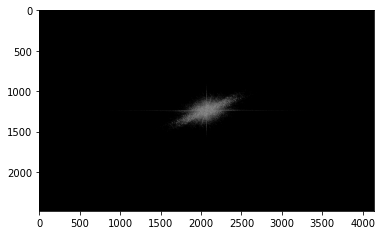

In [15]:
r = np.array(np.reshape(F2_upd, (w,h)), dtype='uint8')
plt.imshow(r, cmap='gray')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


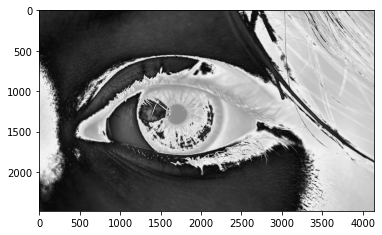

In [16]:
wh = w*h
F2_final = np.reshape(F2, (wh, 1))
for i in indeces:
  s = np.abs(F2_final[i]) + 1
  F2_final[i] = np.log(s)

F2_final = np.reshape(F2_final, (w, h))
a = np.fft.ifft2(F2_final)
F2_final_inv = np.array(a, dtype='uint8')
plt.imshow(F2_final_inv, cmap='gray')